In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your clustered DataFrame (adjust path as needed)
# If you already have df_clustered in memory, skip this cell
data_path = '../../data/nifty/train/full_featured.csv'
df = pd.read_csv(data_path)

# Re-run clustering if needed (same as before)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

features = [
    'daily_return', 'log_return', 'price_range',
    'ma_5', 'ma_20', 'volatility_5', 'volatility_20',
    'rsi_14', 'macd_12_26', 'macd_signal_12_26', 'macd_histogram_12_26',
    'stoch_14', 'stoch_smoothk', 'stoch_smoothd','trend_code'
]
X = df[features].dropna().copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
k = 3  # Use the number of clusters you chose previously
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df_clustered = df.loc[X.index].copy()
df_clustered['cluster'] = clusters

In [15]:
cluster_stats = df_clustered.groupby('cluster').agg(
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std'),
    num_days=('daily_return', 'count')
)
print(cluster_stats)

         avg_daily_return  avg_price_range  volatility  num_days
cluster                                                         
0               -0.003371       120.753496    0.016694      2337
1                0.001200       180.831556    0.008256       996
2                0.003608        65.041207    0.010670      2809


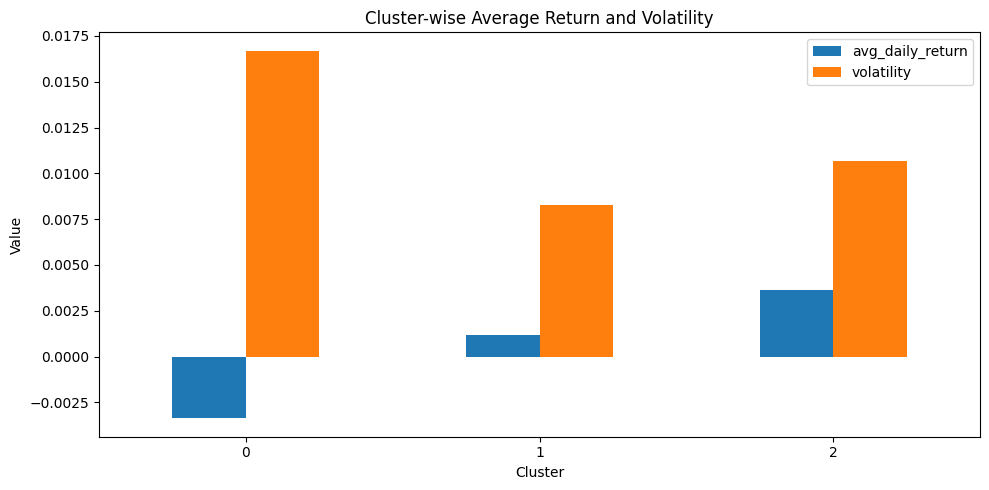

In [16]:
cluster_stats[['avg_daily_return', 'volatility']].plot(kind='bar', figsize=(10, 5))
plt.title('Cluster-wise Average Return and Volatility')
plt.ylabel('Value')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

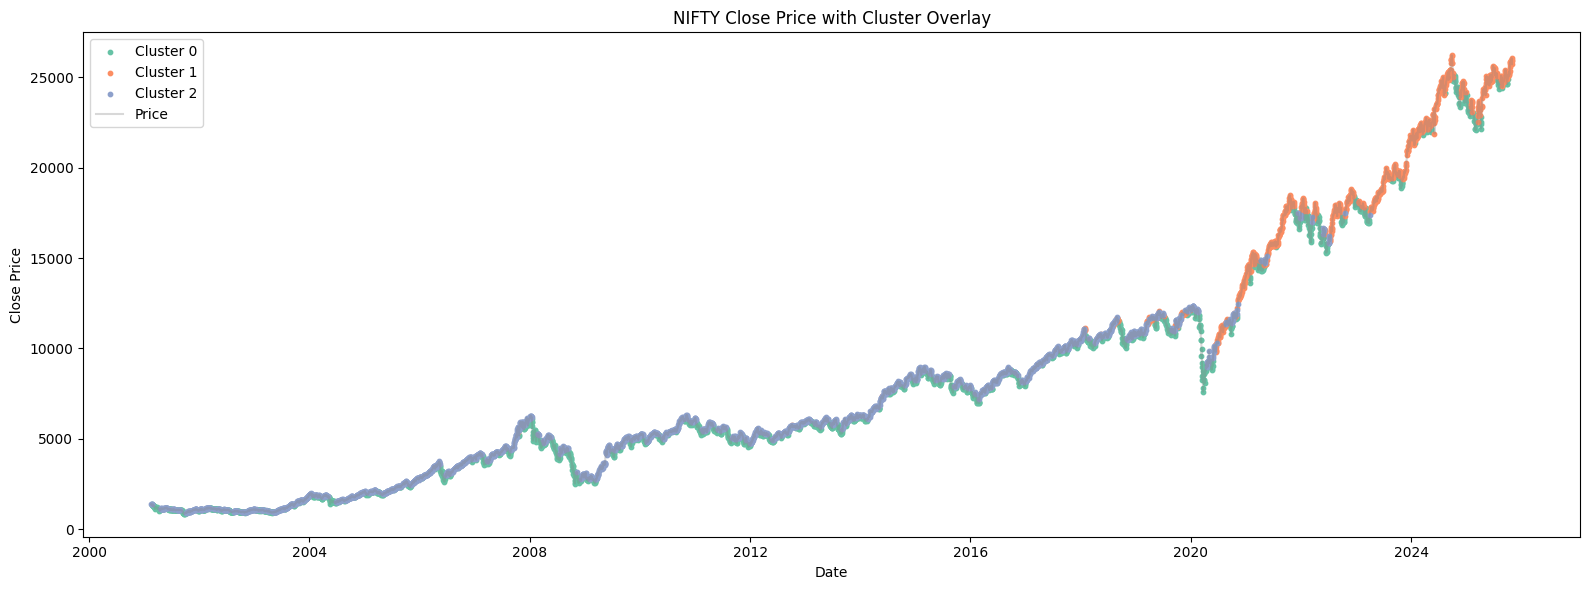

In [17]:
import matplotlib.dates as mdates

# Convert 'date' column to datetime if not already
df_clustered['date'] = pd.to_datetime(df_clustered['date'])

plt.figure(figsize=(16, 6))
palette = sns.color_palette('Set2', n_colors=df_clustered['cluster'].nunique())

for cluster in sorted(df_clustered['cluster'].unique()):
    cluster_data = df_clustered[df_clustered['cluster'] == cluster]
    plt.scatter(
        cluster_data['date'],
        cluster_data['close'],
        label=f'Cluster {cluster}',
        s=10,
        color=palette[cluster]
    )

plt.plot(df_clustered['date'], df_clustered['close'], color='gray', alpha=0.3, label='Price')
plt.title('NIFTY Close Price with Cluster Overlay')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.tight_layout()
plt.show()

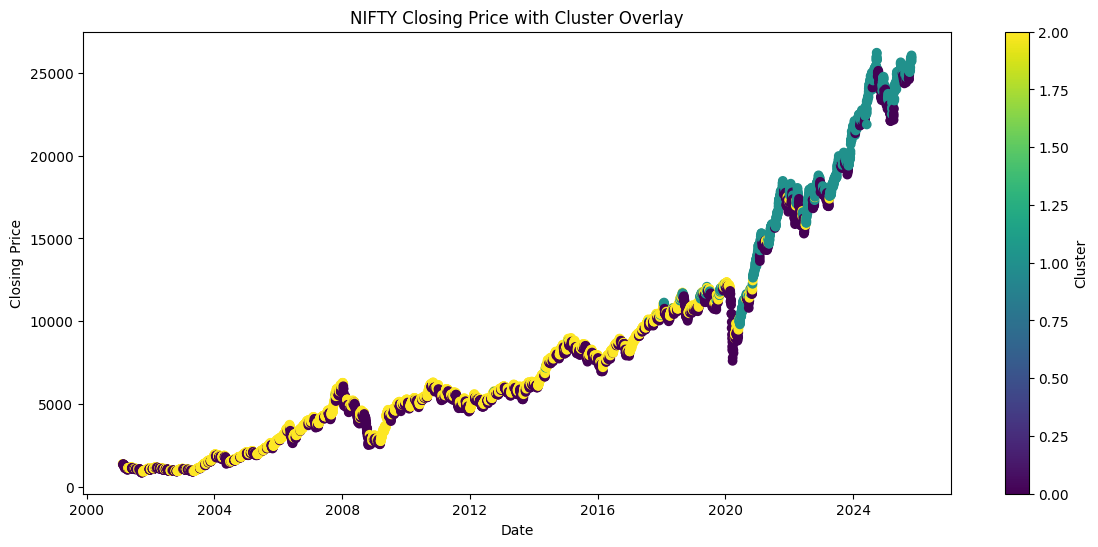

In [18]:
import matplotlib.pyplot as plt

# Ensure 'date' is datetime for proper plotting
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(14, 6))
scatter = plt.scatter(df_clustered['date'], df_clustered['close'], c=df_clustered['cluster'], cmap='viridis', label=df_clustered['cluster'])
plt.title('NIFTY Closing Price with Cluster Overlay')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [19]:
print(df_clustered['cluster'].unique())
print("Number of clusters:", df_clustered['cluster'].nunique())

# Group by cluster and calculate stats
cluster_stats = df_clustered.groupby('cluster')['daily_return'].agg(['mean', 'std', 'count'])
cluster_stats.rename(columns={'mean': 'avg_return', 'std': 'volatility', 'count': 'num_days'}, inplace=True)
print(cluster_stats)


[2 0 1]
Number of clusters: 3
         avg_return  volatility  num_days
cluster                                  
0         -0.003371    0.016694      2337
1          0.001200    0.008256       996
2          0.003608    0.010670      2809


In [20]:
cluster_description = {
    0: "Uptrend/Profitable",
    1: "Downtrend/High Volatility",
    2: "Sideways/Low Volatility"
}

In [21]:
df_clustered['cluster_description'] = df_clustered['cluster'].map(cluster_description)
# Show a sample of the table
# For a specific date, e.g., 20 Jul 2024
specific_date = '2021-07-20'
row = df_clustered[df_clustered['date'] == specific_date][['date', 'cluster', 'cluster_description', 'daily_return']]
print(row)

import pandas as pd
from IPython.display import display

display(df_clustered.head(20))  # Show first 20 rows
df_clustered.to_csv('clustered_dates_with_description.csv', index=False)

                          date  cluster cluster_description  daily_return
5111 2021-07-20 00:00:00+05:30        0  Uptrend/Profitable     -0.007637


,date,open,high,low,close,volume,daily_return,log_return,price_range,ma_5,...,dow_trend_spec_raw,dow_trend_spec,range,avg_range,is_mother_candle,mother_candle_trend,final_trend,trend_code,cluster,cluster_description
33,2001-02-16 00:00:00+05:30,1415.85,1422.95,1376.15,1381.35,0,-0.024952,-0.025269,46.80,1396.960,...,Downtrend,Downtrend,46.80,26.5475,True,Sideways,Downtrend,0,2,Sideways/Low Volatility
34,2001-02-19 00:00:00+05:30,1381.40,1392.05,1369.45,1384.80,0,0.002498,0.002494,22.60,1393.480,...,Sideways,Downtrend,22.60,26.3025,False,Sideways,Sideways,1,2,Sideways/Low Volatility
35,2001-02-20 00:00:00+05:30,1384.85,1392.80,1380.40,1383.85,0,-0.000686,-0.000686,12.40,1392.010,...,Sideways,Downtrend,12.40,25.7950,False,Sideways,Sideways,1,2,Sideways/Low Volatility
36,2001-02-21 00:00:00+05:30,1383.90,1389.55,1364.25,1370.10,0,-0.009936,-0.009986,25.30,1387.360,...,Downtrend,Downtrend,25.30,26.2825,False,Downtrend,Downtrend,0,0,Uptrend/Profitable
37,2001-02-22 00:00:00+05:30,1370.05,1370.05,1335.65,1355.10,0,-0.010948,-0.011008,34.40,1375.040,...,Downtrend,Downtrend,34.40,27.2150,True,Sideways,Downtrend,0,0,Uptrend/Profitable
38,2001-02-23 00:00:00+05:30,1355.10,1362.80,1314.10,1320.45,0,-0.025570,-0.025903,48.70,1362.860,...,Downtrend,Downtrend,48.70,28.6150,True,Sideways,Downtrend,0,0,Uptrend/Profitable
39,2001-02-26 00:00:00+05:30,1320.90,1325.20,1299.05,1312.40,0,-0.006096,-0.006115,26.15,1348.380,...,Downtrend,Downtrend,26.15,27.1000,False,Downtrend,Downtrend,0,0,Uptrend/Profitable
40,2001-02-27 00:00:00+05:30,1312.45,1324.00,1281.90,1295.55,0,-0.012839,-0.012922,42.10,1330.720,...,Downtrend,Downtrend,42.10,27.1800,True,Sideways,Downtrend,0,0,Uptrend/Profitable
41,2001-02-28 00:00:00+05:30,1295.30,1362.25,1294.59,1351.40,0,0.043109,0.042206,67.66,1326.980,...,Uptrend,Uptrend,67.66,29.2105,True,Sideways,Uptrend,2,0,Uptrend/Profitable
42,2001-03-01 00:00:00+05:30,1351.75,1399.55,1345.05,1358.05,0,0.004921,0.004909,54.50,1327.570,...,Uptrend,Uptrend,54.50,30.3080,True,Sideways,Uptrend,2,0,Uptrend/Profitable


In [22]:
# Ensure the data is sorted by date
df_clustered = df_clustered.sort_values('date').reset_index(drop=True)

# Identify where the cluster changes
df_clustered['cluster_change'] = (df_clustered['cluster'] != df_clustered['cluster'].shift()).cumsum()

# Now, each unique value in 'cluster_change' is a run of consecutive days with the same cluster
# Group by consecutive runs
run_stats = df_clustered.groupby('cluster_change').agg(
    start_date=('date', 'first'),
    end_date=('date', 'last'),
    cluster=('cluster', 'first'),
    num_days=('date', 'count'),
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std')
).reset_index(drop=True)

# Make sure long_runs is a copy
long_runs = run_stats.copy()

# Bin avg_daily_return into 3 quantiles
long_runs['return_group'] = pd.qcut(long_runs['avg_daily_return'], 3, labels=['Low Return', 'Medium Return', 'High Return'])

# Bin volatility into 3 quantiles
long_runs['vol_group'] = pd.qcut(long_runs['volatility'], 3, labels=['Low Volatility', 'Medium Volatility', 'High Volatility'])

def define_regime(row):
    if row['return_group'] == 'Low Return' and row['vol_group'] == 'Low Volatility':
        return 'Sideways/Calm'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'Low Volatility':
        return 'Steady Uptrend'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Uptrend'
    elif row['return_group'] == 'Low Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Down/Sideways'
    elif row['return_group'] == 'Medium Return' and row['vol_group'] == 'Medium Volatility':
        return 'Neutral'
    # Add more rules as you see fit
    else:
        return f"{row['return_group']} / {row['vol_group']}"

long_runs['regime'] = long_runs.apply(define_regime, axis=1)

print(long_runs[['start_date', 'end_date', 'cluster', 'num_days', 'avg_daily_return', 'volatility', 'return_group', 'vol_group', 'regime']])

                   start_date                  end_date  cluster  num_days  \
0   2001-02-16 00:00:00+05:30 2001-02-20 00:00:00+05:30        2         3   
1   2001-02-21 00:00:00+05:30 2001-04-18 00:00:00+05:30        0        38   
2   2001-04-19 00:00:00+05:30 2001-04-26 00:00:00+05:30        2         6   
3   2001-04-27 00:00:00+05:30 2001-04-27 00:00:00+05:30        0         1   
4   2001-04-30 00:00:00+05:30 2001-05-31 00:00:00+05:30        2        23   
..                        ...                       ...      ...       ...   
680 2025-08-18 00:00:00+05:30 2025-08-28 00:00:00+05:30        1         8   
681 2025-08-29 00:00:00+05:30 2025-09-03 00:00:00+05:30        0         4   
682 2025-09-04 00:00:00+05:30 2025-09-25 00:00:00+05:30        1        16   
683 2025-09-26 00:00:00+05:30 2025-10-03 00:00:00+05:30        0         5   
684 2025-10-06 00:00:00+05:30 2025-10-31 00:00:00+05:30        1        19   

     avg_daily_return  volatility   return_group          vol_g

In [23]:
# Ensure the data is sorted by date
df_clustered = df_clustered.sort_values('date').reset_index(drop=True)

# Identify where the cluster changes
df_clustered['cluster_change'] = (df_clustered['cluster'] != df_clustered['cluster'].shift()).cumsum()

# Now, each unique value in 'cluster_change' is a run of consecutive days with the same cluster
# Group by consecutive runs
run_stats = df_clustered.groupby('cluster_change').agg(
    start_date=('date', 'first'),
    end_date=('date', 'last'),
    cluster=('cluster', 'first'),
    num_days=('date', 'count'),
    avg_daily_return=('daily_return', 'mean'),
    avg_price_range=('price_range', 'mean'),
    volatility=('daily_return', 'std')
).reset_index(drop=True)

# Make sure long_runs is a copy
long_runs = long_runs.copy()

# Bin avg_daily_return into 3 quantiles
long_runs['return_group'] = pd.qcut(long_runs['avg_daily_return'], 3, labels=['Low Return', 'Medium Return', 'High Return'])

# Bin volatility into 3 quantiles
long_runs['vol_group'] = pd.qcut(long_runs['volatility'], 3, labels=['Low Volatility', 'Medium Volatility', 'High Volatility'])

def define_regime(row):
    if row['return_group'] == 'Low Return' and row['vol_group'] == 'Low Volatility':
        return 'Sideways/Calm'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'Low Volatility':
        return 'Steady Uptrend'
    elif row['return_group'] == 'High Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Uptrend'
    elif row['return_group'] == 'Low Return' and row['vol_group'] == 'High Volatility':
        return 'Volatile Down/Sideways'
    elif row['return_group'] == 'Medium Return' and row['vol_group'] == 'Medium Volatility':
        return 'Neutral'
    # Add more rules as you see fit
    else:
        return f"{row['return_group']} / {row['vol_group']}"

long_runs['regime'] = long_runs.apply(define_regime, axis=1)

print(long_runs[['start_date', 'end_date', 'cluster', 'num_days', 'avg_daily_return', 'volatility', 'return_group', 'vol_group', 'regime']])

                   start_date                  end_date  cluster  num_days  \
0   2001-02-16 00:00:00+05:30 2001-02-20 00:00:00+05:30        2         3   
1   2001-02-21 00:00:00+05:30 2001-04-18 00:00:00+05:30        0        38   
2   2001-04-19 00:00:00+05:30 2001-04-26 00:00:00+05:30        2         6   
3   2001-04-27 00:00:00+05:30 2001-04-27 00:00:00+05:30        0         1   
4   2001-04-30 00:00:00+05:30 2001-05-31 00:00:00+05:30        2        23   
..                        ...                       ...      ...       ...   
680 2025-08-18 00:00:00+05:30 2025-08-28 00:00:00+05:30        1         8   
681 2025-08-29 00:00:00+05:30 2025-09-03 00:00:00+05:30        0         4   
682 2025-09-04 00:00:00+05:30 2025-09-25 00:00:00+05:30        1        16   
683 2025-09-26 00:00:00+05:30 2025-10-03 00:00:00+05:30        0         5   
684 2025-10-06 00:00:00+05:30 2025-10-31 00:00:00+05:30        1        19   

     avg_daily_return  volatility   return_group          vol_g